Podklady pro články Anety Martínkové na iROZHLAS.cz v prosinci 2023.

In [2]:
import os
import json
import pandas as pd

In [3]:
from src.tabulka import tabulka
from src.graf import graf

In [4]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))
wikid = pd.read_json(os.path.join("wikidata","wikidata.json"))
df = df.merge(wikid, on="interpret_hlavni", how="outer")

In [5]:
df = df.sort_values(by=['rok','tyden'])

## Poslední týden v datech

In [6]:
df['week'].dropna().drop_duplicates().sort_values().to_list()[-1]

'2023-43'

## Celkové statistiky od 1/2006

### Počet písní

In [7]:
len(df[['interpret_hlavni','track']].drop_duplicates())

4717

### Počet hlavních interpretů

In [8]:
len(df['interpret_hlavni'].drop_duplicates())

1674

### Z kolika zemí

In [9]:
len(df['zeme_puvodu'].drop_duplicates())

59

### Počet hitů č. 1

In [10]:
len(df[df['pozice'] == 1][['interpret_hlavni','track']].drop_duplicates())

262

## Dominující interpreti (od roku 2006)

### Podle „týdnopísniček“ v top 100

In [11]:
df.groupby("interpret_hlavni").size().nlargest(15)

interpret_hlavni
Kryštof            1458
Chinaski           1267
Mirai              1180
P!Nk               1109
David Guetta       1083
Marek Ztracený     1005
Xindl X             877
Lady Gaga           817
Rihanna             759
Slza                755
Ed Sheeran          748
Imagine Dragons     746
Mandrage            731
Katy Perry          721
Michal Hrůza        668
dtype: int64

### Podle týdnů v top 100

In [12]:
df.groupby("interpret_hlavni")['week'].nunique().nlargest(20)

interpret_hlavni
Kryštof             806
Chinaski            780
David Guetta        687
P!Nk                650
Xindl X             576
Michal Hrůza        574
Mandrage            520
Marek Ztracený      520
Onerepublic         480
Imagine Dragons     471
Coldplay            455
Ed Sheeran          423
Slza                423
Katy Perry          419
Mirai               417
Rihanna             414
Maroon 5            406
Miro Žbirka         403
No Name             399
Support Lesbiens    391
Name: week, dtype: int64

In [13]:
top10interpretu = df.groupby("interpret_hlavni")['week'].nunique().nlargest(20).index.to_list()

### Podle týdnů na vrcholu hitparády

In [14]:
df[df['pozice'] == 1].groupby('interpret_hlavni').size().nlargest(20)

interpret_hlavni
Kryštof             56
Chinaski            39
Mirai               30
Ed Sheeran          28
Miley Cyrus         27
Adele               24
Nelly Furtado       24
P!Nk                23
Xindl X             23
Lewis Capaldi       21
Avicii              16
Shakira             16
David Guetta        14
Ava Max             12
Katy Perry          12
Mandrage            12
Sugababes           12
The Weeknd          12
Alesha Dixon        11
Enrique Iglesias    11
dtype: int64

### Podle písní na vrcholu hitparády

In [15]:
topdeset = pd.DataFrame(df[df['pozice'] == 1].groupby('interpret_hlavni')['track'].nunique().nlargest(10)).reset_index()

In [16]:
vsechny1 = pd.DataFrame(df[df['pozice'] == 1][['interpret_hlavni','track']].drop_duplicates().groupby('interpret_hlavni')['track'].agg(list)).reset_index()

In [17]:
topdeset = topdeset.merge(vsechny1, on='interpret_hlavni', how='inner')

In [18]:
topdeset = topdeset.rename(columns={'interpret_hlavni':'Interpreti','track_x':'#','track_y':'Tracky'})

In [19]:
topdeset['Tracky'] = topdeset['Tracky'].apply(lambda x: " ~ ".join(x))

In [20]:
topdeset

,Interpreti,#,Tracky
0,Chinaski,10,Vedoucí ~ Zadarmo ~ Hlavolam ~ Víno ~ Slovensk...
1,Kryštof,10,Rubikon ~ Atentát ~ Inzerát ~ Cesta ~ Srdcebea...
2,P!Nk,8,Who Knew ~ U & UR Hand ~ So What ~ Sober ~ Rai...
3,Ed Sheeran,6,Shape of You ~ Perfect ~ I Don't Care ~ Bad Ha...
4,Adele,5,Someone Like You ~ Set Fire To The Rain ~ Skyf...
5,Avicii,5,Wake Me Up ~ Hey Brother ~ Addicted To You ~ W...
6,David Guetta,4,When Love Takes Over ~ Sexy Bitch ~ Lovers On ...
7,Enrique Iglesias,4,Do You Know ~ Can You Hear Me ~ Duele el Coraz...
8,Mirai,4,"Když nemůžeš, tak přidej ~ Chci tančit ~ I pře..."
9,Xindl X,4,Láska v housce ~ V blbým věku ~ Cudzinka v tvo...


In [21]:
tabulka(topdeset, titulek='Nejvíce hitů č. 1 v české rádiové hitparádě od roku 2006')

'<table class="dataframe table table--responsive table--w100p table--striped-red table--plain"><caption>Nejvíce hitů č. 1 v české rádiové hitparádě od roku 2006</caption><thead><tr style="text-align: right;"><th class="text-nowrap">Interpreti</th><th class="text-nowrap">#</th><th class="text-nowrap">Tracky</th></tr></thead><tbody class="text-sm"><tr><td>Chinaski</td><td>10</td><td>Vedoucí ~ Zadarmo ~ Hlavolam ~ Víno ~ Slovenský klín ~ Není nám do pláče ~ Venku je na nule ~ Potkal jsem tě po letech ~ Láska a data ~ Měl bych si boty zout</td></tr><tr><td>Kryštof</td><td>10</td><td>Rubikon ~ Atentát ~ Inzerát ~ Cesta ~ Srdcebeat ~ Ty a já ~ Zůstaň tu se mnou (Za sny) ~ Hvězdáři (feat. Sima Martausová) ~ Hned teď (pojď být světlometem) ~ Vánoční</td></tr><tr><td>P!Nk</td><td>8</td><td>Who Knew ~ U &amp; UR Hand ~ So What ~ Sober ~ Raise Your Glass ~ Just Give Me A Reason ~ What About Us ~ Irrelevant</td></tr><tr><td>Ed Sheeran</td><td>6</td><td>Shape of You ~ Perfect ~ I Don\'t Care ~ Bad 

## Graf dominujících interpretů

In [22]:
vsechnytydny = [x for x in df['week'].drop_duplicates().to_list() if len(str(x)) == 7]

In [23]:
def nejvyssi_pozice_interpreta(x):
    pracovni = pd.Series(df[df['interpret_hlavni'] == x].groupby('week')['pozice'].min(), name=x)
    pracovni = pracovni.reindex(vsechnytydny, fill_value=101).sort_index()
    return pracovni

In [24]:
nejvyssi_pozice_interpreta("Karel Gott")

week
2006-01    101.0
2006-02    101.0
2006-03    101.0
2006-04    101.0
2006-05    101.0
           ...  
2023-39    101.0
2023-40    101.0
2023-41    101.0
2023-42    101.0
2023-43    101.0
Name: Karel Gott, Length: 907, dtype: float64

In [25]:
graf_interpretu = []
for i in top10interpretu:
    graf_interpretu.append(nejvyssi_pozice_interpreta(i))

In [26]:
graf(carovy=graf_interpretu, target="pozoruhodni_interpreti", titulek='Nejvyšší hitparádové pozice nejzastoupenějších interpretů', podtitulek=f'''Graf zobrazuje hitparádovou dráhu dvaceti kapel a jednotlivců, kteří od ledna 2006 zaznamenali nejvíce týdnů s alespoň jednou písní mezi stovkou nejhranějších v českých rádiích.''', kredity=["Zdroj dat: ifpicr.cz | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], prvni=True, osay=' ', osay2=' ', skladany=False, naopak=False, vzhurunohama=True, osaymin=1, osaymax=100, skryte=graf_interpretu[2:])

Graf uložen.


## Země původu

In [27]:
df.columns

Index(['Unnamed: 0', 'hitparada', 'rok', 'tyden', 'week', 'pozice', 'track',
       'interpret', 'interpret_hlavni', 'vydavatel', 'id', 'stazeno',
       'nazev_wiki', 'popis_en', 'popis_cs', 'velikost', 'zanry',
       'datum_narozeni', 'datum_umrti', 'zacatek_pusobeni', 'konec_pusobeni',
       'zalozeni', 'zanik', 'gender', 'misto_puvodu', 'zeme_puvodu',
       'obcanstvi', 'etnicita', 'hlas', 'nastroje', 'oceneni', 'nabozenstvi',
       'orientace', 'spotify_id', 'spotify_odberatele'],
      dtype='object')

In [28]:
len(df[(~df['rok'].isnull()) & (df['zeme_puvodu'].isnull())]) / len(df[(~df['rok'].isnull())])

0.14046153846153847

In [29]:
df.groupby('zeme_puvodu').size().nlargest(60)

zeme_puvodu
Spojené státy americké            22361
Česko                             19485
Spojené království                14027
Německo                            2747
Kanada                             2598
Francie                            2204
Švédsko                            2071
Slovensko                          1896
Austrálie                          1283
Nizozemsko                         1135
Španělsko                           951
Barbados                            768
Rumunsko                            741
Belgie                              693
Irsko                               592
Švýcarsko                           513
Kolumbie                            492
Finsko                              465
Itálie                              378
Singapur                            348
Rusko                               299
Jamajka                             276
Kosovo                              235
Norsko                              196
Brazílie                    

In [30]:
top3 = df.groupby('zeme_puvodu').size().nlargest(3).index.to_list()

In [31]:
procentotop3 = int(len(df[df['zeme_puvodu'].isin(top3)]) / len(df) * 100)

In [32]:
chcu = ['Česko','Spojené státy americké','Spojené království','Německo','Slovensko','Kanada','Francie','Švédsko']

In [33]:
nechcu = ['nezjištěno','ostatní']

In [34]:
def puvod_pro_graf(x):
    if x in chcu:
        return x
    if x == None:
        return "nezjištěno"
    else:
        return 'ostatní'

In [35]:
df['odkud'] = df['zeme_puvodu'].apply(lambda x: puvod_pro_graf(x))

In [36]:
roky = [int(x) for x in df['rok'].drop_duplicates().dropna().tolist()]

In [37]:
zastoupeni_zemi = []
for z in chcu + nechcu:
    zastoupeni_zemi.append(pd.Series(df[df['odkud']==z].groupby('rok').size() / df.groupby('rok').size(), name=z).reindex(roky))

In [38]:
graf(carovy=zastoupeni_zemi, target="zastoupeni_zemi", titulek='Zastoupení zemí v týdenních žebříčcích 100 nejhranějších písní', podtitulek=f'''{procentotop3} % jednotlivých příček připadá na kapely či jednotlivce z Česka, Spojených států a Spojeného království.''', kredity=["Zdroj dat: ifpicr.cz | Vizualizace: Michal Kašpárek, iROZHLAS.cz","https://www.irozhlas.cz/zpravy-tag/datova-zurnalistika"], procenta=zastoupeni_zemi, prvni=True, osay=' ', osay2=' ', skladany=False, naopak=False, skryte=zastoupeni_zemi[3:])

Graf uložen.


## Jedničky za jednotlivé země

In [39]:
df['pisen'] = df.apply(lambda x: f"""{x['interpret_hlavni']}: {x['track']}""", axis = 1)

In [40]:
df[df['pozice'] == 1].groupby('zeme_puvodu')[['pisen','week']].first().sort_values(by='week')

,pisen,week
zeme_puvodu,,
Spojené státy americké,Madonna: Hung Up,2006-01
Kolumbie,Juanes: La camisa negra,2006-04
Spojené království,James Blunt: Wisemen,2006-06
Česko,Helena Zeťová: Impossible (Unstoppable),2006-11
Francie,Bob Sinclar: Love Generation,2006-12
Slovensko,Peha: Spomal,2006-45
Kanada,Nelly Furtado: All Good Things,2007-12
Libanon,Mika: Relax (Take It Easy),2007-19
Španělsko,Enrique Iglesias: Do You Know,2007-43


## Zastoupenost žánrů

In [41]:
zanry = df.explode('zanry')

In [42]:
def ze_slovniku(slovnik, druhysloupec):
    with open(os.path.join("data_rucni",slovnik), 'r', encoding='utf-8') as file:
        frejm = pd.DataFrame(json.load(file), index=[0]).transpose().reset_index()
        frejm = frejm.rename(columns = { "index" : "zanry", 0 : druhysloupec})
    return frejm

In [43]:
zanry_kratce = ze_slovniku('zanry_klasik.json','zanry_kratce')
zanry_prvky = ze_slovniku('zanry_prvky.json','zanry_prvky')
zanry = zanry.merge(zanry_kratce, on='zanry', how="outer")
zanry = zanry.merge(zanry_prvky, on='zanry', how="outer")

In [44]:
kratke_zanry = zanry['zanry_kratce'].drop_duplicates().to_list()
kratke_zanry

['pop',
 'elektronická taneční hudba',
 'elektronická hudba',
 'rock',
 'soul a R&B',
 'jazz',
 'folk a country',
 'latinskoamerická hudba',
 nan,
 'hip hop a rap',
 'jamajská hudba',
 'různé',
 'blues',
 'alternativní metal',
 'metal',
 'indie rock',
 'indie pop',
 'disco',
 'mluvené slovo',
 'alternativní hudba',
 'klasická hudba',
 'šanson',
 'filmová hudba']

In [45]:
zanry

,Unnamed: 0,hitparada,rok,tyden,week,pozice,track,interpret,interpret_hlavni,vydavatel,...,nastroje,oceneni,nabozenstvi,orientace,spotify_id,spotify_odberatele,odkud,pisen,zanry_kratce,zanry_prvky
0,100.0,CZ - RADIO - TOP 100,2006.0,1.0,2006-01,1.0,Hung Up,Madonna,Madonna,Warner Music,...,"[kytara, bicí souprava, ukulele, hlas]","[Cena Grammy za nejlepší hudební film, Cena Gr...",None,[bisexualita],6tbjWDEIzxoDsBA1FuhfPW,4831402.0,Spojené státy americké,Madonna: Hung Up,pop,zpěv
1,102.0,CZ - RADIO - TOP 100,2006.0,1.0,2006-01,3.0,Push The Button,Sugababes,Sugababes,Universal Music,...,None,None,None,None,7rZNSLWMjTbwdLNskFbzFf,NaN,Spojené království,Sugababes: Push The Button,pop,zpěv
2,103.0,CZ - RADIO - TOP 100,2006.0,1.0,2006-01,4.0,Tripping,Robbie Williams,Robbie Williams,Warner Music,...,"[hlas, kytara, basová kytara, klávesový nástro...","[Amadeus Austrian Music Awards, Premios Oye!]",None,None,2HcwFjNelS49kFbfvMxQYw,NaN,Spojené království,Robbie Williams: Tripping,pop,zpěv
3,108.0,CZ - RADIO - TOP 100,2006.0,1.0,2006-01,9.0,All About Us,Tatu,Tatu,Universal Music,...,None,None,None,None,7902s7cvHtLQV3K7875DAz,NaN,ostatní,Tatu: All About Us,pop,zpěv
4,111.0,CZ - RADIO - TOP 100,2006.0,1.0,2006-01,12.0,Cool,Gwen Stefani,Gwen Stefani,Universal Music,...,[hlas],[American Music Award for Favorite Pop/Rock Fe...,[katolická církev],None,4yiQZ8tQPux8cPriYMWUFP,NaN,Spojené státy americké,Gwen Stefani: Cool,pop,zpěv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pink Floyd,NaN,...,None,[Cena Grammy za nejlepší rockový instrumentáln...,None,None,0k17h0D3J5VfsdmQ1iZtE9,NaN,Spojené království,Pink Floyd: nan,rock,kytara
288772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pink Floyd,NaN,...,None,[Cena Grammy za nejlepší rockový instrumentáln...,None,None,0k17h0D3J5VfsdmQ1iZtE9,NaN,Spojené království,Pink Floyd: nan,rock,kytara
288773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pop Smoke,NaN,...,[hlas],None,None,None,0eDvMgVFoNV3TpwtrVCoTj,NaN,Spojené státy americké,Pop Smoke: nan,hip hop a rap,rap
288774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Travis Scott,NaN,...,"[hlas, bicí automat, klaviatura, syntezátor, s...",[Latin Grammy Award for Best Short Form Music ...,None,None,0Y5tJX1MQlPlqiwlOH1tJY,NaN,Spojené státy americké,Travis Scott: nan,NaN,NaN


In [46]:
zanry

,Unnamed: 0,hitparada,rok,tyden,week,pozice,track,interpret,interpret_hlavni,vydavatel,...,nastroje,oceneni,nabozenstvi,orientace,spotify_id,spotify_odberatele,odkud,pisen,zanry_kratce,zanry_prvky
0,100.0,CZ - RADIO - TOP 100,2006.0,1.0,2006-01,1.0,Hung Up,Madonna,Madonna,Warner Music,...,"[kytara, bicí souprava, ukulele, hlas]","[Cena Grammy za nejlepší hudební film, Cena Gr...",None,[bisexualita],6tbjWDEIzxoDsBA1FuhfPW,4831402.0,Spojené státy americké,Madonna: Hung Up,pop,zpěv
1,102.0,CZ - RADIO - TOP 100,2006.0,1.0,2006-01,3.0,Push The Button,Sugababes,Sugababes,Universal Music,...,None,None,None,None,7rZNSLWMjTbwdLNskFbzFf,NaN,Spojené království,Sugababes: Push The Button,pop,zpěv
2,103.0,CZ - RADIO - TOP 100,2006.0,1.0,2006-01,4.0,Tripping,Robbie Williams,Robbie Williams,Warner Music,...,"[hlas, kytara, basová kytara, klávesový nástro...","[Amadeus Austrian Music Awards, Premios Oye!]",None,None,2HcwFjNelS49kFbfvMxQYw,NaN,Spojené království,Robbie Williams: Tripping,pop,zpěv
3,108.0,CZ - RADIO - TOP 100,2006.0,1.0,2006-01,9.0,All About Us,Tatu,Tatu,Universal Music,...,None,None,None,None,7902s7cvHtLQV3K7875DAz,NaN,ostatní,Tatu: All About Us,pop,zpěv
4,111.0,CZ - RADIO - TOP 100,2006.0,1.0,2006-01,12.0,Cool,Gwen Stefani,Gwen Stefani,Universal Music,...,[hlas],[American Music Award for Favorite Pop/Rock Fe...,[katolická církev],None,4yiQZ8tQPux8cPriYMWUFP,NaN,Spojené státy americké,Gwen Stefani: Cool,pop,zpěv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pink Floyd,NaN,...,None,[Cena Grammy za nejlepší rockový instrumentáln...,None,None,0k17h0D3J5VfsdmQ1iZtE9,NaN,Spojené království,Pink Floyd: nan,rock,kytara
288772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pink Floyd,NaN,...,None,[Cena Grammy za nejlepší rockový instrumentáln...,None,None,0k17h0D3J5VfsdmQ1iZtE9,NaN,Spojené království,Pink Floyd: nan,rock,kytara
288773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pop Smoke,NaN,...,[hlas],None,None,None,0eDvMgVFoNV3TpwtrVCoTj,NaN,Spojené státy americké,Pop Smoke: nan,hip hop a rap,rap
288774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Travis Scott,NaN,...,"[hlas, bicí automat, klaviatura, syntezátor, s...",[Latin Grammy Award for Best Short Form Music ...,None,None,0Y5tJX1MQlPlqiwlOH1tJY,NaN,Spojené státy americké,Travis Scott: nan,NaN,NaN


In [47]:
rockeri = zanry[zanry['zanry_kratce'].str.contains('rock',na=False)]['interpret_hlavni'].drop_duplicates().to_list()

In [48]:
rapperi = zanry[zanry['zanry_kratce'].str.contains('hip hop',na=False)]['interpret_hlavni'].drop_duplicates().to_list()

In [49]:
metalaci = zanry[zanry['zanry_kratce'].str.contains('metal',na=False)]['interpret_hlavni'].drop_duplicates().to_list()

In [50]:
elektro = zanry[zanry['zanry_kratce'].str.contains('elektro',na=False)]['interpret_hlavni'].drop_duplicates().to_list()

In [51]:
folkari = zanry[zanry['zanry_kratce'].str.contains('folk',na=False)]['interpret_hlavni'].drop_duplicates().to_list()

In [52]:
popik = zanry[zanry['zanry_kratce'].str.contains('pop',na=False)]['interpret_hlavni'].drop_duplicates().to_list()

<Axes: xlabel='rok'>

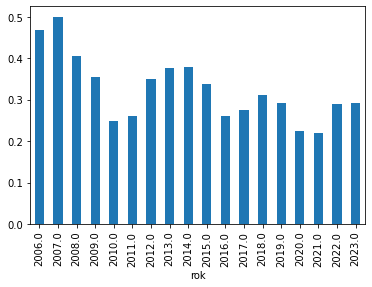

In [53]:
(df[df['interpret_hlavni'].isin(rockeri)].groupby('rok').size() / df.groupby('rok').size()).plot.bar()

<Axes: xlabel='rok'>

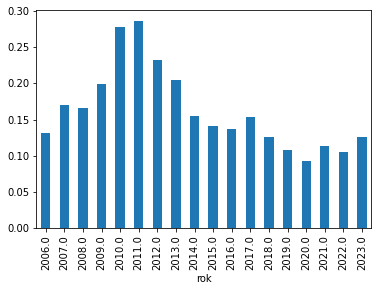

In [54]:
(df[df['interpret_hlavni'].isin(rapperi)].groupby('rok').size() / df.groupby('rok').size()).plot.bar()

<Axes: xlabel='rok'>

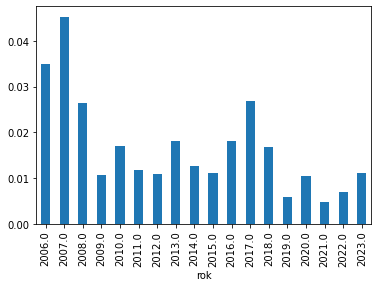

In [55]:
(df[df['interpret_hlavni'].isin(metalaci)].groupby('rok').size() / df.groupby('rok').size()).plot.bar()

<Axes: xlabel='rok'>

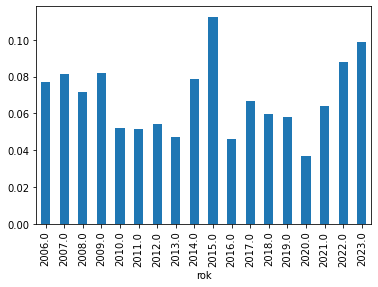

In [56]:
(df[df['interpret_hlavni'].isin(folkari)].groupby('rok').size() / df.groupby('rok').size()).plot.bar()

<Axes: xlabel='rok'>

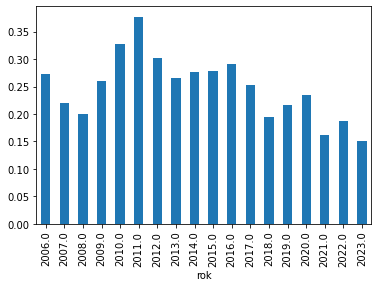

In [57]:
(df[df['interpret_hlavni'].isin(elektro)].groupby('rok').size() / df.groupby('rok').size()).plot.bar()

<Axes: xlabel='rok'>

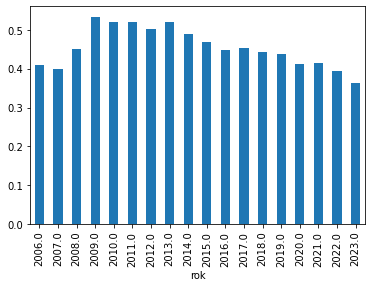

In [58]:
(df[df['interpret_hlavni'].isin(popik)].groupby('rok').size() / df.groupby('rok').size()).plot.bar()

## Země původu a žánry

In [106]:
pet_zemi = df[df['rok'] >= 2019].groupby('zeme_puvodu').size().nlargest(6).index.to_list()

In [112]:
zemexzanry = {}
for z in pet_zemi:
    prac_dat = df[df['zeme_puvodu'] == z].explode('zanry')
    zemexzanry[z] = ", ".join(prac_dat[(prac_dat['rok'] >= 2019) & (prac_dat['zanry'] != 'pop music')].explode('zanry').groupby('zanry').size().nlargest().index.to_list())
zemexzanry = pd.DataFrame(zemexzanry, index=[0]).transpose().reset_index().rename(columns={0: 'Nejčastější žánry', 'index': 'Země'})
zemexzanry['Nejčastější žánry'] = zemexzanry['Nejčastější žánry'].apply(lambda x: x.replace('American folk music', 'americká lidová hudba'))

In [113]:
zemexzanry

,Země,Nejčastější žánry
0,Česko,"rock, pop rock, alternativní rock, americká li..."
1,Spojené státy americké,"pop rock, elektropop, alternativní rock, hip h..."
2,Spojené království,"house music, pop rock, synthpop, alternativní ..."
3,Německo,"house music, deep house, elektronická taneční ..."
4,Nizozemsko,"electro house, elektronická taneční hudba, dee..."
5,Kanada,"alternativní R&B, pop rock, folk pop, pop punk..."


In [114]:
tabulka(zemexzanry, titulek='Co dovážíme: nejzastoupenější země a žánry', podtitulek=f"""Data za posledních 5 let. Ze srovnání jsme vyřadili univerzální štítek „pop music“.""")

'<table class="dataframe table table--responsive table--w100p table--striped-red table--plain"><caption>Co dovážíme: nejzastoupenější země a žánry</caption><thead><tr style="text-align: right;"><th class="text-nowrap">Země</th><th class="text-nowrap">Nejčastější žánry</th></tr></thead><tbody class="text-sm"><tr><td>Česko</td><td>rock, pop rock, alternativní rock, americká lidová hudba, estráda</td></tr><tr><td>Spojené státy americké</td><td>pop rock, elektropop, alternativní rock, hip hop, dance-pop</td></tr><tr><td>Spojené království</td><td>house music, pop rock, synthpop, alternativní rock, indie pop</td></tr><tr><td>Německo</td><td>house music, deep house, elektronická taneční hudba, future house, tech house</td></tr><tr><td>Nizozemsko</td><td>electro house, elektronická taneční hudba, deep house, progressive house, big room house</td></tr><tr><td>Kanada</td><td>alternativní R&amp;B, pop rock, folk pop, pop punk, alternativní rock</td></tr></tbody><tfoot><tr style="text-align: cent